# [월간 데이콘 14. 신용카드 사용자 연체 예측](https://dacon.io/competitions/official/235713/overview/description)

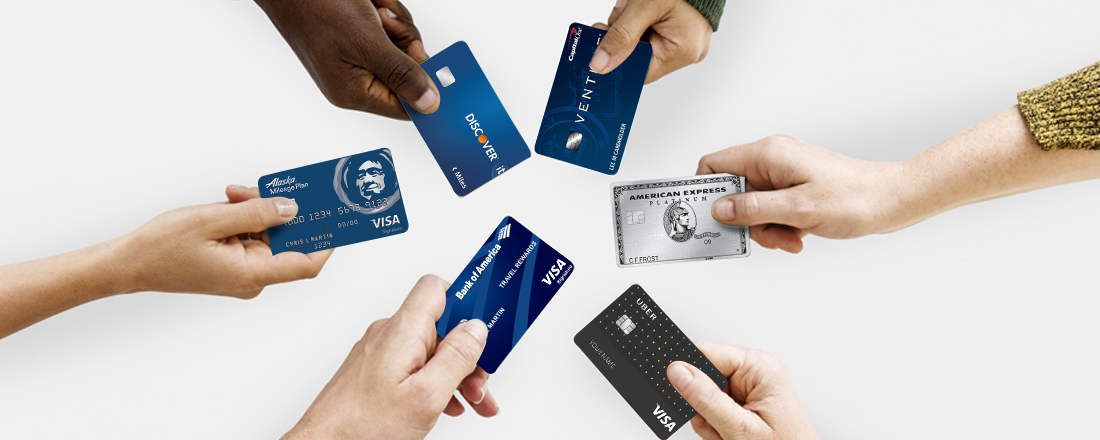

### 1. 주제 : 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

### 2. 배경
신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정합니다. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측합니다. 
현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현하고자 합니다. 사용자의 대금 연체 정도를 예측할 수 있는 인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴해주세요!

### 3. 대회 설명
신용카드 사용자들의 개인 신상정보 데이터로 `사용자의 신용카드 대금 연체 정도를 예측`

### 4. 평가 : Logloss

# 목표
이번 발표는 제가 처음으로 나가봤던 공모전을 가져와봤습니다. 썩 좋은 성적은 거두질 못했지만 1등 커널의 아이디어가 참신했던 기억이 납니다. EDA -> 모델링까지 1시간 안에 할 수 없을 것 같다고 생각했습니다. 대신 몇가지 전처리와 모델의 성능을 쉽게 높일 수 있는 파생 변수에 대한 아이디어를 고심해보실 수 있도록 베이스라인을 짜두었습니다. 각자 파생 변수에 대한 아이디어를 생각해보시고, 높은 feature importance를 보이는 파생 변수를 만들어보세요! 제 발표 시간엔 1등 커널분의 간단하지만 핵심적인 아이디어들과 과정을 공유해보겠습니다. (1등 커널 미리 보시면 안 돼요..)

In [ ]:
# catboost, category_encoders를 다운받지 않으신 분은 아래 코드를 통해 다운 받아주세요.
!pip install catboost

In [ ]:
!pip install category_encoders

In [ ]:
# 만약 numpy, pandas, matplotlib, seaborn, sklearn 라이브러리가 없으시면 따로 다운을 진행해주세요.

In [ ]:
 # 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings('ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [ ]:
# 데이터 불러오기. 
# 경로를 변경해주세요!
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### 변수 설명
- `index` : 제공된 데이터에서 같은 사용자여도 index는 다를 수 있습니다. 예) 같은 사람이 복수의 카드를 발급할 경우
- `gender`: 성별
- `car`: 차량 소유 여부
- `reality`: 부동산 소유 여부
- `child_num`: 자녀 수
- `income_total`: 연간 소득
- `income_type`: 소득 분류 / ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- `edu_type`: 교육 수준 / ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- `family_type`: 결혼 여부 / ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- `house_type`: 생활 방식 /['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- `DAYS_BIRTH`: 출생일 /	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- `DAYS_EMPLOYED`: 업무 시작일 /데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함
- `FLAG_MOBIL`: 핸드폰 소유 여부
- `work_phone`: 업무용 전화 소유 여부
- `phone`: 전화 소유 여부
- `email`: 이메일 소유 여부
- `occyp_type`: 직업 유형													
- `family_size`: 가족 규모
- `begin_month`: 신용카드 발급 월 /데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- `credit`: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
# 결측치를 찾고, 처리해봅시다.

In [ ]:
# numeric 변수 중 이상치 처리

### Feature Engineering

In [ ]:
# 의미 없는 변수들을 생각해본 후, 제거

In [ ]:
# DAYS_EMPLOYED 변수에 대해 이상치를 찾아본 후, 처리해봅시다.

In [ ]:
# 'DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED' 변수들을 보기 쉽게 양수로 변환해줍시다.

In [ ]:
# 파생변수 생성
# 아래처럼 다양한 아이디어를 생각해봅시다!
for df in [train, test]:
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED'] # before_EMPLOYED :  고용되기 전까지의 일수

In [ ]:
# 상관계수 행렬 히트맵을 그려봅시다. 만약 다중공선성이 의심되는 변수가 있다면 제거해줍시다.

In [ ]:
# skew가 높은 income_total을 로그 변환 해봅시다.

In [ ]:
# numeric, category 컬럼 분류해봅시다.
numerical_feats = train.dtypes[train.dtypes != 'object'].index.tolist()
numerical_feats.remove('credit')
print('Number of Numerical features: ', len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == 'object'].index.tolist()
print('Number of Categorical features: ', len(categorical_feats))

In [ ]:
# log 변환한 income_total을 제외한 나머지 변수들을 standard scaler를 이용하여 정규화 해봅시다.

In [ ]:
# encoding
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])
test[categorical_feats] = encoder.fit_transform(test[categorical_feats])

In [ ]:
# 파라미터 지정 (소요 시간을 고려해서 fold=3으로 지정했습니다. 가장 좋았을 때의 성능은 15라 합니다.)
n_est = 100
seed = 42
n_fold = 3
n_class = 3 # credit = 0,1,2

target = 'credit'
X = train.drop(target, axis = 1)
y = train[target]
X_test = test

In [ ]:
# Baseline 코드
skfold = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state = 42)
folds = []

for train_idx, valid_idx, in skfold.split(X,y):
    folds.append((train_idx, valid_idx))
    
cat_pred = np.zeros((X.shape[0], n_class))
cat_pred_test = np.zeros((X_test.shape[0], n_class))
cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type',]

for fold in range(n_fold):
    print(f'\n----------FOLD{fold}---------------\n')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
    train_data = Pool(data = X_train, label = y_train, cat_features=cat_cols)
    valid_data = Pool(data = X_valid, label = y_valid, cat_features=cat_cols)
    
    model_cat = CatBoostClassifier()
    model_cat.fit(train_data, eval_set = valid_data, use_best_model = True, early_stopping_rounds = 100, verbose = 100)
    
    cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
    cat_pred_test += model_cat.predict_proba(X_test) / n_fold
    print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
    
print(f'\tLog Loss: {log_loss(y, cat_pred):.6f}')

In [ ]:
# feature importance를 그리는 함수
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

In [ ]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')